# Prueba Práctica Simulación
### Alejandro Enríquez
### 10mo Ciclo
### Ingeniería en Ciencias de la Computación

In [1]:
# Imports

import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from datetime import datetime
from datetime import timedelta

In [2]:
# Carga de datos
data_vacunas = pd.read_csv('vacunas.csv')
data_fabricantes = pd.read_csv('fabricantes.csv')
data_internacional = pd.read_csv('owid-covid-data.csv')
print(data_internacional)

      iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1          AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2          AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3          AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4          AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
85994      ZWE    Africa     Zimbabwe  2021-04-30      38257.0       22.0   
85995      ZWE    Africa     Zimbabwe  2021-05-01      38260.0        3.0   
85996      ZWE    Africa     Zimbabwe  2021-05-02      38281.0       21.0   
85997      ZWE    Africa     Zimbabwe  2021-05-03      38293.0       12.0   
85998      ZWE    Africa     Zimbabwe  2021-05-04      38327.0       34.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  .

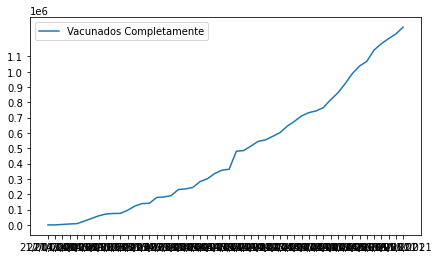

In [3]:
# TOTAL DE PERSONAS VACUNADAS

plt.figure(figsize=(7,4))

plt.plot(data_vacunas['fecha'], data_vacunas['dosis_total'], label="Vacunados Completamente")
plt.yticks(range(0,1200000,100000))
plt.legend(loc='upper left')


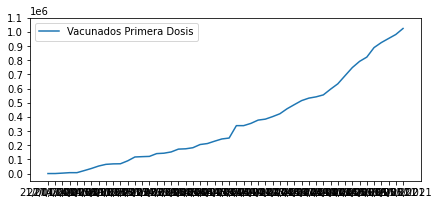

In [4]:
plt.figure(figsize=(7,3))
plt.plot(data_vacunas['fecha'], data_vacunas['primera_dosis'], label="Vacunados Primera Dosis")
plt.yticks(range(0,1200000,100000))
plt.legend(loc='upper left')

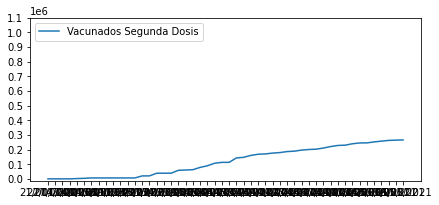

In [5]:
plt.figure(figsize=(7,3))
plt.plot(data_vacunas['fecha'], data_vacunas['segunda_dosis'], label="Vacunados Segunda Dosis")
plt.yticks(range(0,1200000,100000))
plt.legend(loc='upper left')

<BarContainer object of 4 artists>

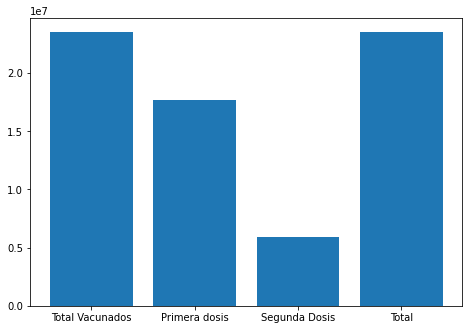

In [6]:
total_vacunados = data_vacunas['dosis_total']
primera_dosis = data_vacunas['primera_dosis']
segunda_dosis = data_vacunas['segunda_dosis']

labels = ['Total Vacunados' ,'Primera dosis','Segunda Dosis','Total']
datos = [sum(total_vacunados), sum(primera_dosis), sum(segunda_dosis), sum(primera_dosis)+sum(segunda_dosis)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, datos)

                      total
vaccine                    
Oxford/AstraZeneca   420000
Pfizer/BioNTech      659880
Sinovac             1020000


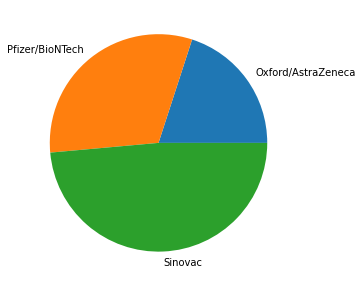

In [7]:
# FABRICANTES DE LA VACUNA

grafica_fabricantes = data_fabricantes.groupby(['vaccine']).sum()
total = grafica_fabricantes['total']
print(grafica_fabricantes)

label = ['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sinovac']
plt.figure(figsize=(5,5))
plt.pie(total, labels=label, startangle=0)
plt.show()

['1', '2', '2', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '5']
               vaccine   total  arrived_at mes
0      Pfizer/BioNTech    8190  20/01/2021   1
1      Pfizer/BioNTech   16380  17/02/2021   2
2      Pfizer/BioNTech   17550  24/02/2021   2
3      Pfizer/BioNTech   31590  03/03/2021   3
4              Sinovac   20000  06/03/2021   3
5      Pfizer/BioNTech   73710  10/03/2021   3
6   Oxford/AstraZeneca   84000  17/03/2021   3
7      Pfizer/BioNTech   62010  17/03/2021   3
8      Pfizer/BioNTech   65520  24/03/2021   3
9      Pfizer/BioNTech   66690  31/03/2021   3
10     Pfizer/BioNTech   53820  05/04/2021   4
11             Sinovac  300000  07/04/2021   4
12             Sinovac  700000  10/04/2021   4
13     Pfizer/BioNTech   53820  14/04/2021   4
14     Pfizer/BioNTech   54990  21/04/2021   4
15  Oxford/AstraZeneca  336000  24/04/2021   4
16     Pfizer/BioNTech   54990  28/04/2021   4
17     Pfizer/BioNTech  100620  04/05/2021   5
                

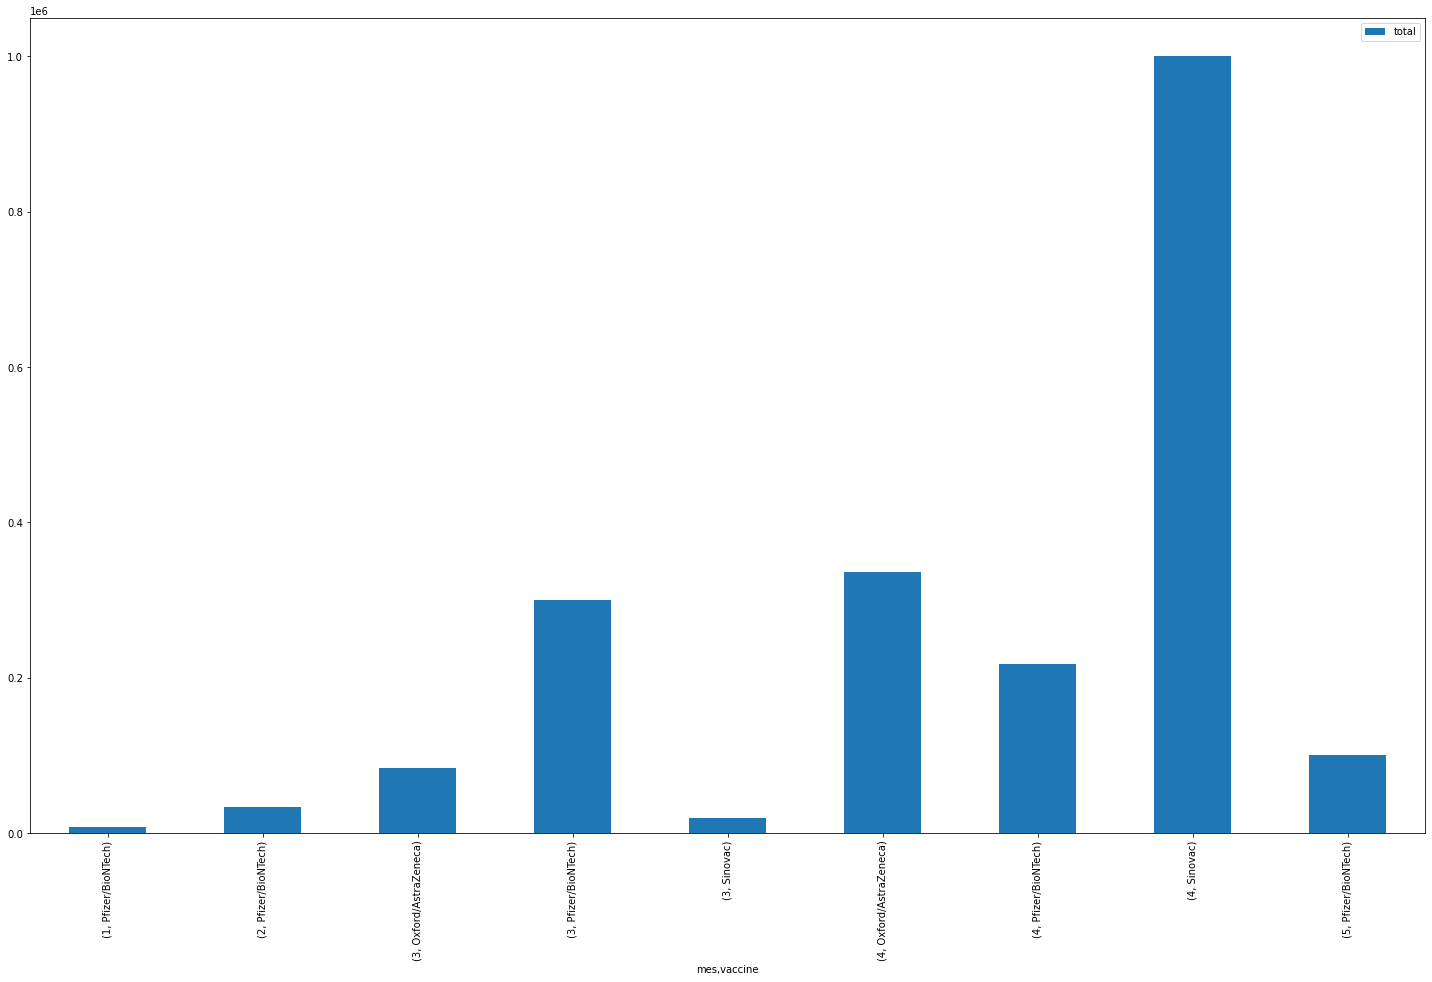

In [8]:
# VACUNAS POR MES DE LLEGADA Y FABRICANTE
meses = []
grafica_meses = data_fabricantes

for i in data_fabricantes['arrived_at']:
    meses.append(i[4])
print(meses)

grafica_meses['mes'] = meses
print(grafica_meses)

gr = grafica_meses.groupby(['mes','vaccine']).sum()
print(gr)
gr.plot.bar(figsize=(25,15))
plt.show()


Fecha inicial: 01/04/2021
Fecha final: 10/04/2021


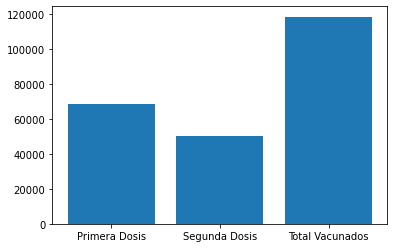

In [9]:
# PARÁMETROS DE FECHA
formato='%d/%m/%Y'

fecha_inicio = input('Fecha inicial: ')
fecha_inicio = datetime.strptime(fecha_inicio, formato)

fecha_final = input('Fecha final: ')
fecha_final = datetime.strptime(fecha_final, formato)

i1 = -1
for i, j in data_vacunas.iterrows():
    fecha = j['fecha']
    fecha = datetime.strptime(fecha,formato)
    if fecha_inicio >= fecha:
        i1 = i-1
    if fecha_final < fecha:
        i2 = i-1
        break
        
if i1 == -1:
    d1 = primera_dosis[i2]
    d2 = segunda_dosis[i2]
    tv = total_vacunados[i2]
else:
    d1 = primera_dosis[i2] - primera_dosis[i1]
    d2 = segunda_dosis[i2] - segunda_dosis[i1]
    tv = total_vacunados[i2] - total_vacunados[i1]
    
label = (['Primera Dosis', 'Segunda Dosis', 'Total Vacunados'])
datos = [d1, d2, tv]
plt.bar(label, datos)
plt.show()

In [10]:
# MODELO DE REGRESIÓN
data_vacunas['fecha'] = data_vacunas['fecha'].map(lambda x: (datetime.strptime(x, formato) - datetime.strptime("20/01/2021", formato)).days)
data_fabricantes['arrived_at'] = data_fabricantes['arrived_at'].map(lambda x: (datetime.strptime(x, formato) - datetime.strptime("20/01/2021", formato)).days)

In [11]:
# Entrenamiento 
xtrain, xtest, ytrain, ytest = tts(data_vacunas['fecha'], data_vacunas['dosis_total'], test_size=0.2)
modelo = LinearRegression()
entrenamiento = np.array(xtrain).reshape(-1,1)
modelo.fit(entrenamiento, ytrain)

prediccion = list(range(min(data_vacunas['fecha']), max(data_vacunas['fecha'])+35))
pred = modelo.predict(np.array(prediccion).reshape(-1,1))

VACUNACIÓN COMPLETA


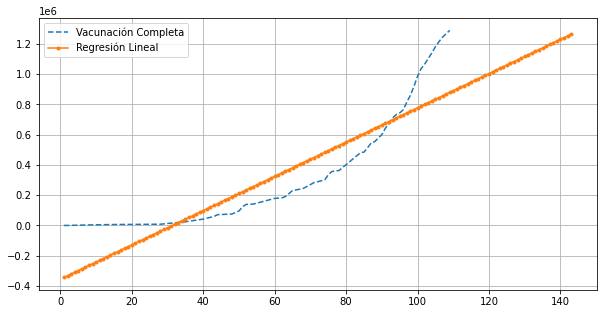

0           0
1         108
2        2982
3        6228
4        8190
5       24492
6       42114
7       59316
8       71148
9       74472
10      75258
11      95915
12     123176
13     139359
14     141191
15     178970
16     182261
17     191179
18     230770
19     235000
20     244866
21     283106
22     301069
23     335093
24     356783
25     363255
26     480962
27     485132
28     514151
29     545132
30     554369
31     577711
32     601229
33     643702
34     675510
35     711204
36     732717
37     743937
38     765489
39     816175
40     861393
41     920865
42     987452
43    1036794
44    1067472
45    1141262
46    1182085
47    1215676
48    1245822
49    1289962
Name: dosis_total, dtype: int64


In [12]:
data_vacunas.head()

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(data_vacunas['fecha'], data_vacunas['dosis_total'], '--', label='Vacunación Completa')
plt.plot(prediccion, pred, '.-', label="Regresión Lineal")
plt.legend(loc='upper left')
print("VACUNACIÓN COMPLETA")
plt.show()
print(data_vacunas['dosis_total'])

PRIMERA DOSIS


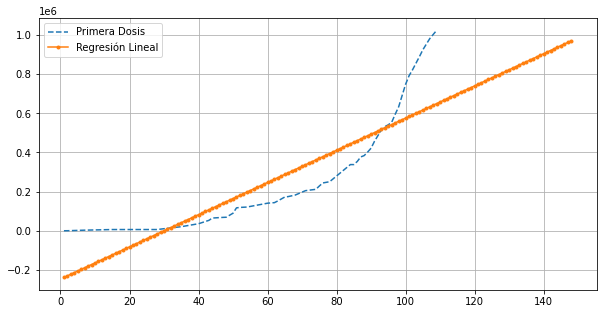

In [13]:
data_vacunas.head()
xtrain, xtest, ytrain, ytest = tts(data_vacunas['fecha'], data_vacunas['primera_dosis'], test_size=0.2)
modelo = LinearRegression()
entrenamiento = np.array(xtrain).reshape(-1,1)
modelo.fit(entrenamiento, ytrain)

prediccion = list(range(min(data_vacunas['fecha']), max(data_vacunas['fecha'])+40))
pred = modelo.predict(np.array(prediccion).reshape(-1,1))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(data_vacunas['fecha'], data_vacunas['primera_dosis'], '--', label='Primera Dosis')
plt.plot(prediccion, pred, '.-', label="Regresión Lineal")
plt.legend(loc='upper left')
print("PRIMERA DOSIS")
plt.show()

SEGUNDA DOSIS


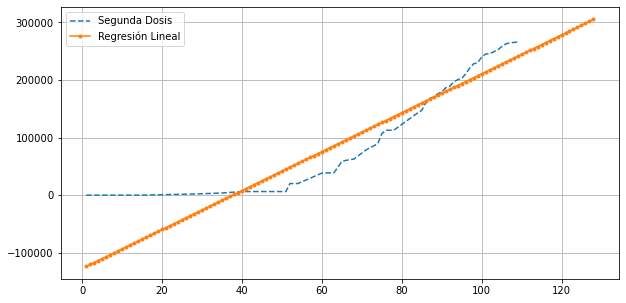

In [14]:
data_vacunas.head()
xtrain, xtest, ytrain, ytest = tts(data_vacunas['fecha'], data_vacunas['segunda_dosis'], test_size=0.2)
modelo = LinearRegression()
entrenamiento = np.array(xtrain).reshape(-1,1)
modelo.fit(entrenamiento, ytrain)

prediccion = list(range(min(data_vacunas['fecha']), max(data_vacunas['fecha'])+20))
pred = modelo.predict(np.array(prediccion).reshape(-1,1))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(data_vacunas['fecha'], data_vacunas['segunda_dosis'], '--', label='Segunda Dosis')
plt.plot(prediccion, pred, '.-', label="Regresión Lineal")
plt.legend(loc='upper left')
print("SEGUNDA DOSIS")
plt.show()

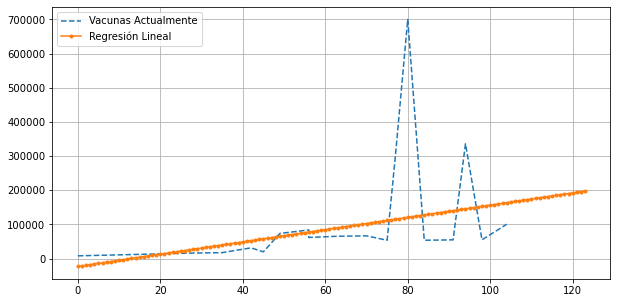

In [15]:
data_fabricantes.head()
xtrain, xtest, ytrain, ytest = tts(data_fabricantes['arrived_at'], data_fabricantes['total'], test_size=0.2)
modelo = LinearRegression()
entrenamiento = np.array(xtrain).reshape(-1,1)
modelo.fit(entrenamiento, ytrain)

prediccion = list(range(min(data_fabricantes['arrived_at']), max(data_fabricantes['arrived_at'])+20))
pred = modelo.predict(np.array(prediccion).reshape(-1,1))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(data_fabricantes['arrived_at'], data_fabricantes['total'], '--', label='Vacunas Actualmente')
plt.plot(prediccion, pred, '.-', label="Regresión Lineal")
plt.legend(loc='upper left')
plt.show()


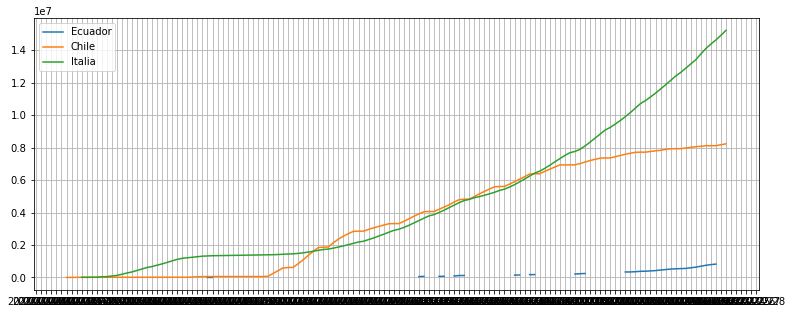

In [17]:
# COMPARACIÓN CON OTROS PAÍSES
internacional = pd.DataFrame()
internacional['pais'] = data_internacional['location']
internacional['fecha'] = data_internacional['date']
internacional['vacunados'] = data_internacional['total_vaccinations']
internacional['p_vacunados'] = data_internacional['people_vaccinated']

data_ecuador = internacional[internacional['pais']=='Ecuador']
data_chile = internacional[internacional['pais']=='Chile']
data_italia = internacional[internacional['pais']=='Italy']
#print(data_vacunas['dosis_total'])
plt.figure(figsize=(13,5))
plt.grid(True)
plt.plot(data_ecuador['fecha'], data_ecuador['p_vacunados'], label='Ecuador')
plt.plot(data_chile['fecha'], data_chile['p_vacunados'], label='Chile')
plt.plot(data_italia['fecha'], data_italia['p_vacunados'], label='Italia')
plt.legend(loc='upper left')
plt.show()


In [18]:
data_ecuador = data_ecuador.dropna()
data_chile = data_chile.dropna()
data_italia = data_italia.dropna()

In [19]:
formato2 = '%Y-%m-%d'
data_ecuador['fecha'] = data_ecuador['fecha'].map(lambda x: (datetime.strptime(x, formato2) - datetime.strptime("2021-01-01", formato2)).days)
data_chile['fecha'] = data_chile['fecha'].map(lambda x: (datetime.strptime(x, formato2) - datetime.strptime("2021-01-01", formato2)).days)
data_italia['fecha'] = data_italia['fecha'].map(lambda x: (datetime.strptime(x, formato2) - datetime.strptime("2021-01-01", formato2)).days)

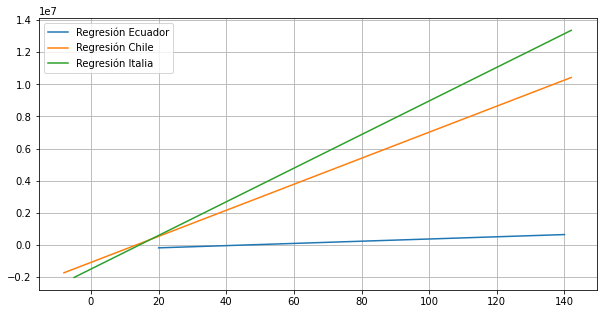

In [20]:
xtrain1, xtest1, ytrain1, ytest1 = tts(data_ecuador['fecha'], data_ecuador['p_vacunados'], test_size=0.2)
xtrain2, xtest2, ytrain2, ytest2 = tts(data_chile['fecha'], data_chile['p_vacunados'], test_size=0.2)
xtrain3, xtest3, ytrain3, ytest3 = tts(data_italia['fecha'], data_italia['p_vacunados'], test_size=0.2)

modelo1 = LinearRegression()
modelo2 = LinearRegression()
modelo3 = LinearRegression()

entrenamiento1 = np.array(xtrain1).reshape(-1,1)
entrenamiento2 = np.array(xtrain2).reshape(-1,1)
entrenamiento3 = np.array(xtrain3).reshape(-1,1)

modelo1.fit(entrenamiento1, ytrain1)
modelo2.fit(entrenamiento2, ytrain2)
modelo3.fit(entrenamiento3, ytrain3)

prediccion1 = list(range(min(data_ecuador['fecha']), max(data_ecuador['fecha'])+20))
prediccion2 = list(range(min(data_chile['fecha']), max(data_chile['fecha'])+20))
prediccion3 = list(range(min(data_italia['fecha']), max(data_italia['fecha'])+20))

pred1 = modelo1.predict(np.array(prediccion1).reshape(-1,1))
pred2 = modelo2.predict(np.array(prediccion2).reshape(-1,1))
pred3 = modelo3.predict(np.array(prediccion3).reshape(-1,1))

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(prediccion1, pred1, label='Regresión Ecuador')
plt.plot(prediccion2, pred2, label='Regresión Chile')
plt.plot(prediccion3, pred3, label='Regresión Italia')
plt.legend(loc='upper left')
plt.show()

In [16]:
# FECHA TENTATIVA DE TOTALIDAD DE VACUNADOS
xtrain, xtest, ytrain, ytest = tts(data_vacunas['fecha'], data_vacunas['dosis_total'], test_size=0.2)
modelo = LinearRegression()
entrenamiento = np.array(xtrain).reshape(-1,1)
modelo.fit(entrenamiento, ytrain)

LinearRegression()

Población objetivo: 17672684
En  3.995 días
Para el  2025-05-09 22:38:56.125512 concluirá la vacunación
VACUNACIÓN COMPLETA


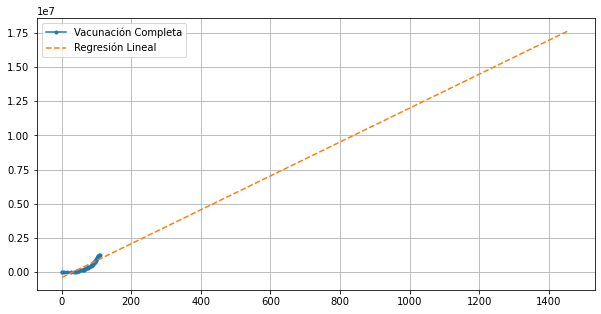

In [25]:
pred = [0]

while pred[len(pred)-1] < 17000000:
    prediccion = list(range(min(data_vacunas['fecha']), max(data_vacunas['fecha'])+1350))
    pred = modelo.predict(np.array(prediccion).reshape(-1,1))

poblacion=pred[len(pred)-1]
dias = prediccion[len(prediccion)-1]
ahora = datetime.now()
fecha_tentativa = ahora + timedelta(days=dias)

print("Población objetivo:" , round(poblacion))
print("En ",round(dias/365, 3), "días")
print("Para el ", fecha_tentativa, "concluirá la vacunación")

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(data_vacunas['fecha'], data_vacunas['dosis_total'], '.-', label='Vacunación Completa')
plt.plot(prediccion, pred, '--', label="Regresión Lineal")
plt.legend(loc='upper left')
print("VACUNACIÓN COMPLETA")
plt.show()

# Análisis
### ¿Cuál tiene mejor predicción?
#### La mejor predicción sería utilizando una regresión polinomial, ya que se adapta a los datos obtenidos, sin embargo por cuestiones de computo, tiempo y que no se especificó el uso de una regresión en específico en este trabajo se optó por utilizar la regresión lineal. Con un gran conjunto de datos tiene cierto grado de presición, pero Ecuador al estar aún lejos de concluir su vacunación y a un ritmo desacelerado no es posible obtener mucha precisión en este sentido, sin embargo como vamos se puede decir que la gráfica sigue el patrón

### Ventajas y desventajas de los modelos
#### Los modelos de regresión se utilizan dependiendo del caso, en este caso se utilizó un modelo de regresión lineal, que con la cantidad de datos trabajados no fue muy preciso, sin embargo por cuestiones de computo, tiempo y que no se especificó el uso de una regresión en específico este trabajo esta realizado con regresión lineal, que arrojó buenos resultados.

### Opinión
#### El manejo de datos para simular o predecir un comportamiento nos permite obtener la idea de como se puede desenvolver una situación, en este caso el covid, al tratarse con datos reales y con una situación muy importante que estamos viviendo ahora mismo, podemos observar que en nuestro país, para sorpresa de nadie, estamos muy atrasados en la vacunación.

### Conclusiones
#### La utilización de regresiones para predecir o simular comportamientos nos permite obtener una idea de la situación que estamos y estaremos viviendo en el país, este tipo de herramientas son muy poderosas para poder desenvolverse en diferentes ámbitos, ya sea laboral o familiar, pues podemos tener una idea de cuanto falta para que esto termine.

### Recomendaciónes
#### La especificación de una regresión en particular, para evitar el mal entendimiento del objetivo comparativo de las preguntas finales. 